## Classification Modeling

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report

In [2]:
df = pd.read_csv('data/master.csv')

In [3]:
df.head()

,time,title,text,upvotes,comments,sub,title_word_count,text_word_count,sentiment,title_tokens,text_tokens
0,1.686799e+09,"what exactly is mastodon, misskey, lemmy and ...",i’ve heard a lot of people talk about joining ...,0.50,0,1,10,32,0.0000,exactli mastodon misskey lemmi fedivers,heard lot peopl talk join mastodon especi also...
1,1.686799e+09,would you still feel pain when paralyzed?,if you get shot in the spine and instantly bec...,1.00,0,1,8,37,-0.7882,would still feel pain paralyz,get shot spine instantli becom paralyz neck wo...
2,1.686798e+09,someone else’s pov,i am curious on how other people experience pu...,1.00,1,1,4,55,0.9109,someon els pov,curiou peopl experi put someon els shoe actual...
3,1.686797e+09,"practically speaking, how is praxeology diffe...",whenever i read or hear that a “praxeology is ...,0.67,2,1,9,115,0.4832,practic speak praxeolog differ psycholog,whenev read hear praxeolog way deduc behavior ...
4,1.686796e+09,how does an open collector output work?,i've done some reading and it seems like essen...,0.50,2,1,8,142,0.2937,open collector output work,done read seem like essenti strang devic work ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11516 entries, 0 to 11515
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              11516 non-null  float64
 1   title             11516 non-null  object 
 2   text              11516 non-null  object 
 3   upvotes           11516 non-null  float64
 4   comments          11516 non-null  int64  
 5   sub               11516 non-null  int64  
 6   title_word_count  11516 non-null  int64  
 7   text_word_count   11516 non-null  int64  
 8   sentiment         11516 non-null  float64
 9   title_tokens      11516 non-null  object 
 10  text_tokens       11497 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 989.8+ KB


In [5]:
df['sub'].value_counts(normalize = True)

1    0.500608
2    0.499392
Name: sub, dtype: float64

In [6]:
df.isna().sum()

time                 0
title                0
text                 0
upvotes              0
comments             0
sub                  0
title_word_count     0
text_word_count      0
sentiment            0
title_tokens         0
text_tokens         19
dtype: int64

In [7]:
df.shape

(11516, 11)

In [8]:
df.dropna(inplace = True)

In [9]:
df.shape

(11497, 11)

In [10]:
df.isna().sum()

time                0
title               0
text                0
upvotes             0
comments            0
sub                 0
title_word_count    0
text_word_count     0
sentiment           0
title_tokens        0
text_tokens         0
dtype: int64

## Modeling with Text Tokens

In [11]:
X = df['text_tokens']
y = df['sub']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2023)

#### Counter Vectorizer and Naive Bayes

In [12]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [13]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('nb', MultinomialNB())])

In [14]:
cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.8010882679309997

In [15]:
pipe.score(X_train, y_train)

0.876014845743447

In [16]:
pipe.score(X_test, y_test)

0.8219130434782609

#### Counter Vectorizer and Logistic Regression (with Ridge Like Penalty)

In [17]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logr', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000))
])

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()),
                ('logr',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [19]:
cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.8511930461683311

In [20]:
pipe.score(X_train, y_train)

0.9690327070285316

In [21]:
pipe.score(X_test, y_test)

0.8866086956521739

#### Counter Vectorizer & Random Forrest

In [22]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('rf', RandomForestClassifier())])

In [24]:
cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.8800733716668347

In [25]:
pipe.score(X_train, y_train)

0.9988401762932034

In [26]:
pipe.score(X_test, y_test)

0.8963478260869565

After testing out with text tokens vs original text, I realized the models are performing slightly better with the original text. I believe this is due to the loss of some context as the model tries to discern between complex and layman questions, some of the more common stop words are assisting the model in it's ability to recognize simplicity.

## Modeling with Original Text

In [27]:
X = df['text']
y = df['sub']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2023)

#### Counter Vectorizer and Naive Bayes

In [29]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('nb', MultinomialNB())])

In [31]:
cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.8291569992266048

In [32]:
pipe.score(X_train, y_train)

0.9008350730688935

In [33]:
pipe.score(X_test, y_test)

0.8459130434782609

In [34]:
pgrid = {
    # 'cvec__max_features': [None, 1000, 5000],
    # 'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [0.4, 0.5, 0.6],
    'cvec__ngram_range': [(1, 1), (1,2)],
    # 'cvec__stop_words': [None, 'english'],
    'nb__alpha': [0.4, 0.5, 0.6],
    # 'nb__fit_prior': [True, False],
    # 'nb__class_prior': [None, [0.3, 0.7]]
}
    

In [35]:
gs = GridSearchCV(pipe, pgrid, cv = 5)

In [36]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.4, 0.5, 0.6],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'nb__alpha': [0.4, 0.5, 0.6]})

In [37]:
gs.score(X_train, y_train)

0.9901414984922292

In [38]:
gs.score(X_test, y_test)

0.9099130434782609

In [39]:
gs.best_params_

{'cvec__max_df': 0.5, 'cvec__ngram_range': (1, 2), 'nb__alpha': 0.5}

In [40]:
gs_nb = gs.best_estimator_

#### Counter Vectorizer and Logistic Regression (with Ridge Like Penalty)

In [41]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logr', LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000))
])

In [42]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()),
                ('logr',
                 LogisticRegression(max_iter=2000, solver='liblinear'))])

In [43]:
cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.8784485692188708

In [44]:
pipe.score(X_train, y_train)

0.9834145209928091

In [45]:
pipe.score(X_test, y_test)

0.9133913043478261

In [46]:
pgrid = {
    # 'cvec__max_features': [None, 1000, 5000],
    # 'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [0.3, 0.4, 0.5],
    'cvec__ngram_range': [(1, 1), (1,2), (1,3)],
    # 'cvec__stop_words': [None, 'english'],
    'logr__C': [0.5, 0.7, 1],
    'logr__solver': ['newton-cg', 'liblinear'] 
}

In [47]:
gs = GridSearchCV(pipe, pgrid, cv = 5)

In [48]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logr',
                                        LogisticRegression(max_iter=2000,
                                                           solver='liblinear'))]),
             param_grid={'cvec__max_df': [0.3, 0.4, 0.5],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'logr__C': [0.5, 0.7, 1],
                         'logr__solver': ['newton-cg', 'liblinear']})

In [49]:
gs.score(X_train, y_train)

0.9989561586638831

In [50]:
gs.score(X_test, y_test)

0.9210434782608695

In [51]:
gs.best_params_

{'cvec__max_df': 0.4,
 'cvec__ngram_range': (1, 3),
 'logr__C': 1,
 'logr__solver': 'liblinear'}

In [52]:
gs_best = gs.best_estimator_

#### Counter Vectorizer & Random Forrest

In [53]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [54]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('rf', RandomForestClassifier())])

In [55]:
cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.8793781902552205

In [56]:
pipe.score(X_train, y_train)

0.9990721410345628

In [57]:
pipe.score(X_test, y_test)

0.9036521739130435

After trying several different models such as Multinomal Naive Bayes, Random Forrest, and Logistic Regression, it became clear that they are performing relatively well and similarly to one another. However, the best performance after some hypertuning with GridSearchCV was Logistic Regression with a ridge-like regularization.

The best paramters for this Grid Search were max features as none, min df as 1, max df as 0.4, ngram range as (1,3), stop words as none, regularization strength with a moderate value of 1, and using the liblinear solver.

This means the model had no limit on the number of features it can use. For min df, for word had to appear atleast once and for max df, the word couldn't appear in more than 40% of the posts. For the ngram range it uses unigrams, bigrams, and trigrams feature extraction of word combinations for better analysis.

#### Best Grid Search Continued

In [58]:
gs_best

Pipeline(steps=[('cvec', CountVectorizer(max_df=0.4, ngram_range=(1, 3))),
                ('logr',
                 LogisticRegression(C=1, max_iter=2000, solver='liblinear'))])

In [59]:
y_preds = gs_best.predict(X_train)
y_preds_test = gs_best.predict(X_test)

In [60]:
confusion_matrix(y_train, y_preds)

array([[4291,    1],
       [   8, 4322]])

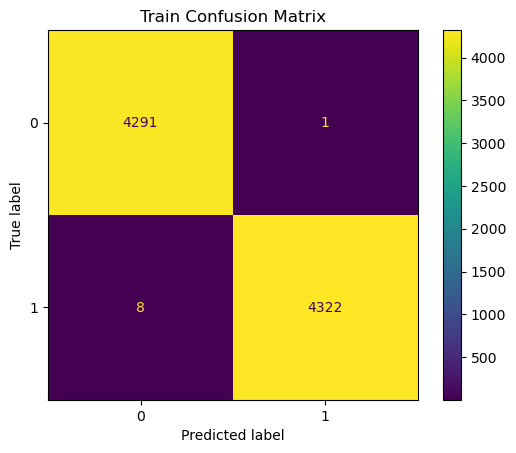

In [61]:
cm = confusion_matrix(y_train, y_preds)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.title('Train Confusion Matrix')
plt.savefig('images/Train Confusion Matrix.png', dpi = 500);

In [62]:
confusion_matrix(y_test, y_preds_test)

array([[1366,   92],
       [ 135, 1282]])

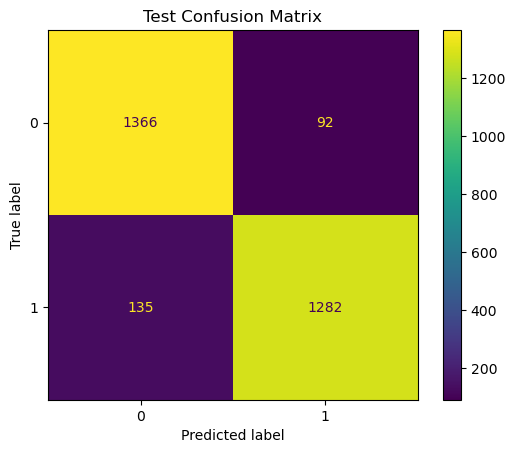

In [63]:
cm_test = confusion_matrix(y_test, y_preds_test)
cmd_test = ConfusionMatrixDisplay(cm_test)
cmd_test.plot();
plt.title('Test Confusion Matrix')
plt.savefig('images/Test Confusion Matrix.png', dpi = 500);

In [64]:
roc_auc_score(y_train, y_preds)

0.9989597166649807

In [65]:
roc_auc_score(y_test, y_preds_test)

0.9208140810247504

In [66]:
print(classification_report(y_test, y_preds_test, digits = 5))

              precision    recall  f1-score   support

           1    0.91006   0.93690   0.92328      1458
           2    0.93304   0.90473   0.91867      1417

    accuracy                        0.92104      2875
   macro avg    0.92155   0.92081   0.92098      2875
weighted avg    0.92139   0.92104   0.92101      2875



In conclusuion, the model is performing much better than the baseline score of 0.50 and is testing at approximately 0.92 ROC AUC score which plots the true positive rate against false positives. This high score indicates that the model demonstrates a strong ability to distinguish between positive and negative instances by effectively balancing the true positive rate and false positives, making it a valuable tool for classification between scientific and simple questions. I believe this can be a great tool for businesses using AI tools for personalized content delivery and customer support as it can distinguish the users input level of complexity and respond with an appropriate level of explanation.

For future research, if I had more time alotted I would try a variety of other models such as KNN, SVM, Gradient Boosting and Ada Boosting. It may also be useful to include other features in my X variable or possibly combining the title and text into it's own column for a better idea of the full context of the post.